# Linear Regression 


## Importing required libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
import random
import mglearn
from heapq import heapify, heappop

from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score

# To execute a cell line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Sydney Dataset

### Import Data

In [3]:
# Read data
df_sydney = pd.read_csv(r'C:\Users\Akhila Sakiramolla\Desktop\My Files\IUB\Semester 1\Applied Machine Learning\Assignments\Data\data.csv')

print("The number of rows in data : {}".format(df_sydney.shape[0]))
print("The number of columns in data : {}".format(df_sydney.shape[1]))
print("The first few rows of the data:")
df_sydney.head()

The number of rows in data : 4600
The number of columns in data : 18
The first few rows of the data:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# Exploring the datatypes of the columns
print('Datatypes of Columns:',df_sydney.dtypes)            

Datatypes of Columns: date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


### Data Preprocessing

#### 1) checking for missing values

In [5]:
 #To Find Total Count, Total #Unique values, Total #Missing values and Missing value percentage

def DescriptionTable(df):
    DescriptionTable = pd.DataFrame()

    DescriptionTable['TotalCount'] = df.count()             #Total number of values present in the columns
    DescriptionTable['UniqueCount'] = df.nunique()          #Total number of unique values present in the columns
    DescriptionTable['MissingCount'] = df.isnull().sum()    #Total number of Missing values present in the columns
    DescriptionTable['MissingPercent'] = round((df.isnull().sum()/df.shape[0])*100, 2)    #Missing values percentage
    DescriptionTable.set_index(df.columns, inplace=True)    #Setting column names as index for dataframe

    # Counting number zero values in columns
    df_zero = (df==0).astype(int).sum(axis=0) # returns a series
    df_zero.to_dict()   # converting series to dictionary

    # Mapping it back to DescriptionTable
    DescriptionTable['ZeroValueCount'] = DescriptionTable.index.map(df_zero)
    DescriptionTable['ZeroValuePercent'] = round((DescriptionTable['ZeroValueCount']/df.shape[0])*100, 2)

    return DescriptionTable                                 

In [6]:
DescriptionTable(df_sydney)

,TotalCount,UniqueCount,MissingCount,MissingPercent,ZeroValueCount,ZeroValuePercent
date,4600,70,0,0.0,0,0.00
price,4600,1741,0,0.0,49,1.07
bedrooms,4600,10,0,0.0,2,0.04
bathrooms,4600,26,0,0.0,2,0.04
sqft_living,4600,566,0,0.0,0,0.00
sqft_lot,4600,3113,0,0.0,0,0.00
floors,4600,6,0,0.0,0,0.00
waterfront,4600,2,0,0.0,4567,99.28
view,4600,5,0,0.0,4140,90.00
condition,4600,5,0,0.0,0,0.00


In [7]:
# There are no missing values in the data, so no need to use SimpleImputer

#### 2) Dropping columns that are not useful

In [8]:
# Drpping 'date','street' column as they can be ignored
df_sydney.drop(columns = ['date','street','statezip'],inplace = True)
print("The number of columns in data : {}".format(df_sydney.shape[1]))

The number of columns in data : 15


In [9]:
# Remove columns with constant value as it does not provide any useful information
for i in df_sydney.columns:
    if (df_sydney[i].nunique())<2:
        df_sydney.drop(columns = i,inplace = True)

print("The number of columns in data : {}".format(df_sydney.shape[1]))

The number of columns in data : 14


### 1) a. Determining Continuous and Categorical variables

In [10]:
# Indetifying Continuous variables 

cont_dtypes = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
listContinuous = []

for i in df_sydney.columns:
    if (df_sydney[i].dtype in cont_dtypes):
        listContinuous.append(i)
print("The Continuous columns identified from the dataset are", listContinuous)

The Continuous columns identified from the dataset are ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


In [11]:
# Indetifying Categorical variables 

listCategorical = []
for i in df_sydney.columns:
    if (df_sydney[i].dtype == 'str' or df_sydney[i].dtype == 'object'):
        listCategorical.append(i)
print("The categorical columns identified from the dataset are", listCategorical)

The categorical columns identified from the dataset are ['city']


### 1) b. Drop rows without valid sales price

In [12]:
# Checking if there are any null values in 'price' column
df_sydney['price'].isnull().sum()

0

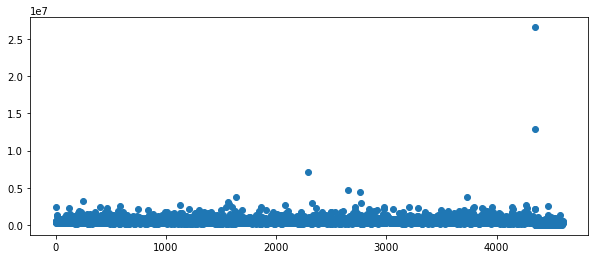

In [13]:
# Observing the distribution of 'price' column
fig = plt.figure(figsize=(10,4))
plt.scatter(df_sydney.index, df_sydney['price'])
plt.show()

In [14]:
# Observing percentile distribution
df_sydney['price'].describe(percentiles=[.01, .02, .03, .05, .1, .5, .9, .92, .93, .95, .97, .98, .99])
# we see that there are some outliers as well as some entries with price = '0' 

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
1%       0.000000e+00
2%       1.424860e+05
3%       1.699550e+05
5%       2.000000e+05
10%      2.399500e+05
50%      4.609435e+05
90%      9.000000e+05
92%      9.750000e+05
93%      1.027210e+06
95%      1.184050e+06
97%      1.387806e+06
98%      1.625200e+06
99%      2.005220e+06
max      2.659000e+07
Name: price, dtype: float64

In [15]:
# Checking number of rows with price = '0' and high price (values above 97% percentile)
df_sydney[df_sydney['price'] == 0].shape
df_sydney[df_sydney['price'] >= 1270000].shape 
# There are 49 entries with price = '0' which are not helpful and are misleading for the model so we drop these rows
# There are some rows that have very high price, which maybe outliers and can mislead the model, so we drop them

df_sydney = df_sydney[(df_sydney['price'] > 0) & (df_sydney['price'] < 1270000)]
df_sydney.shape

(49, 14)

(186, 14)

(4365, 14)

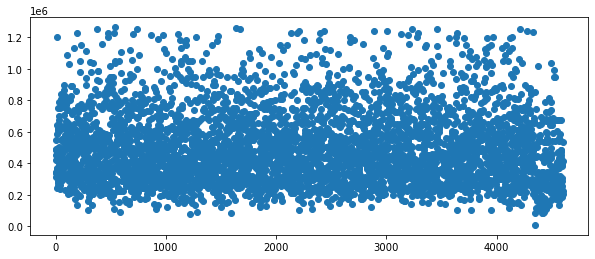

In [16]:
# Observing the distribution of 'price' column after dropping rows with irrelavant price values
fig = plt.figure(figsize=(10,4))
plt.scatter(df_sydney.index, df_sydney['price'])
plt.show()

### 2) Distribution of continuous variables and target variable

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of bedrooms')

Text(0.5, 0, 'bedrooms')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of bedrooms'}, xlabel='bedrooms', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of bathrooms')

Text(0.5, 0, 'bathrooms')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of bathrooms'}, xlabel='bathrooms', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of sqft_living')

Text(0.5, 0, 'sqft_living')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of sqft_living'}, xlabel='sqft_living', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of sqft_lot')

Text(0.5, 0, 'sqft_lot')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of sqft_lot'}, xlabel='sqft_lot', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of floors')

Text(0.5, 0, 'floors')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of floors'}, xlabel='floors', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of waterfront')

Text(0.5, 0, 'waterfront')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of waterfront'}, xlabel='waterfront', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of view')

Text(0.5, 0, 'view')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of view'}, xlabel='view', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of condition')

Text(0.5, 0, 'condition')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of condition'}, xlabel='condition', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of sqft_above')

Text(0.5, 0, 'sqft_above')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of sqft_above'}, xlabel='sqft_above', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of sqft_basement')

Text(0.5, 0, 'sqft_basement')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of sqft_basement'}, xlabel='sqft_basement', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of yr_built')

Text(0.5, 0, 'yr_built')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of yr_built'}, xlabel='yr_built', ylabel='Density'>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of yr_renovated')

Text(0.5, 0, 'yr_renovated')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of yr_renovated'}, xlabel='yr_renovated', ylabel='Density'>

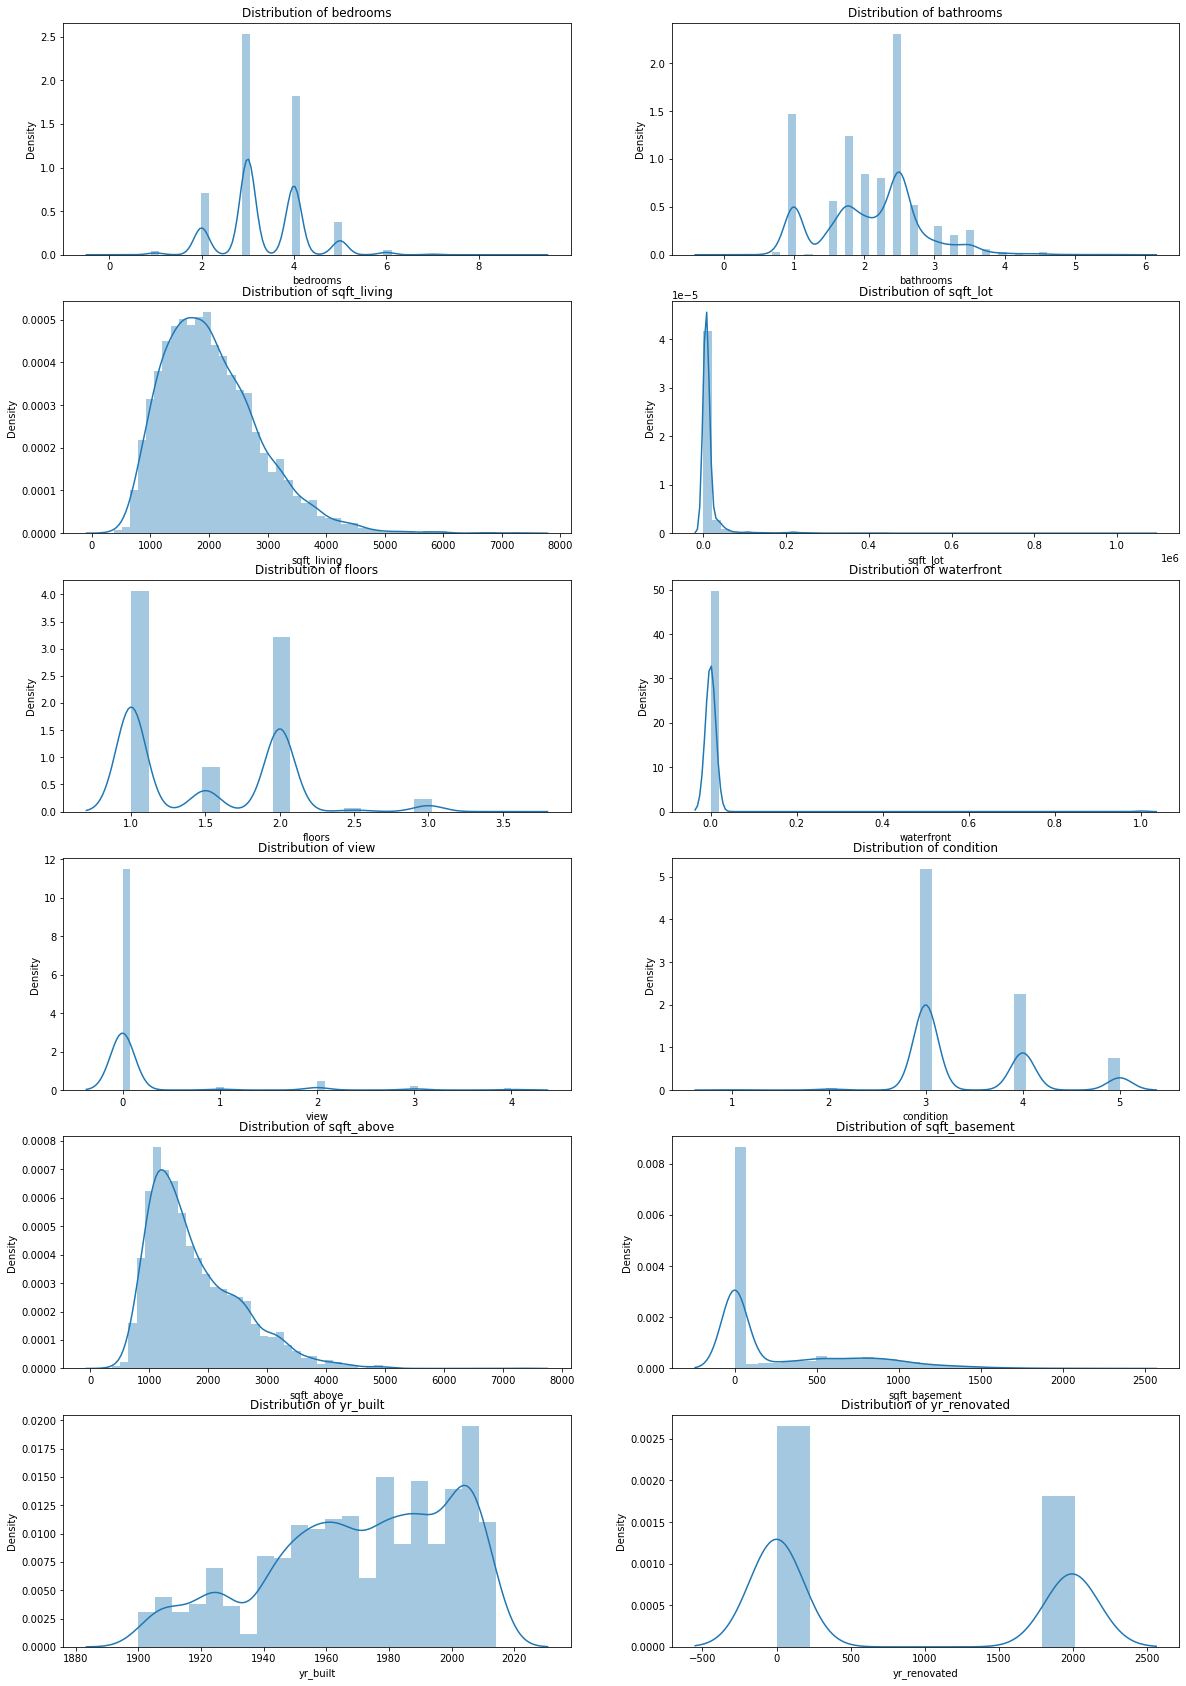

In [17]:
# Plotting Continuous variables
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
listContinuous.remove('price')  # dropping target variable

fig = plt.figure(figsize=(20,35))
for i in listContinuous:
    plt.subplot(a, b, c)
    plt.title('Distribution of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(df_sydney[i] )
    c = c + 1

plt.show()

In [18]:
# From the above plots, the distribution of 'sqft_above' and 'sqft_living' are similar, so lets check the correlation of these variables
print("The correlation between 'sqft_above' & 'sqft_living' variables is:", df_sydney['sqft_above'].corr(df_sydney['sqft_living']))

The correlation between 'sqft_above' & 'sqft_living' variables is: 0.8599954249097598


In [19]:
# The correlation is very high that implies we can use either of the columns and drop the other one
df_sydney.drop(columns = ['sqft_above'],inplace = True)
df_sydney.shape

(4365, 13)

Text(0.5, 1.0, 'Distribution of Target variable')

Text(0.5, 0, 'price')

C:\Users\Akhila Sakiramolla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Target variable'}, xlabel='price', ylabel='Density'>

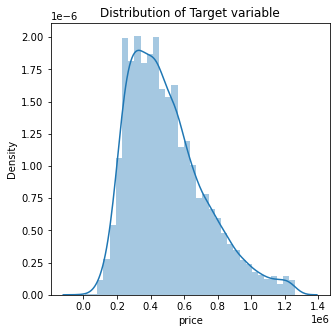

In [20]:
# Plotting Target variable
fig = plt.figure(figsize=(5,5))
plt.title('Distribution of Target variable')
plt.xlabel('price')
sns.distplot(df_sydney['price'])
plt.show()

### 3) Dependency of the target on each continuous feature (2d scatter plot)

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & bedrooms')

Text(0.5, 0, 'bedrooms')

<AxesSubplot:title={'center':'Scatter plot of Price & bedrooms'}, xlabel='bedrooms', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & bathrooms')

Text(0.5, 0, 'bathrooms')

<AxesSubplot:title={'center':'Scatter plot of Price & bathrooms'}, xlabel='bathrooms', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & sqft_living')

Text(0.5, 0, 'sqft_living')

<AxesSubplot:title={'center':'Scatter plot of Price & sqft_living'}, xlabel='sqft_living', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & sqft_lot')

Text(0.5, 0, 'sqft_lot')

<AxesSubplot:title={'center':'Scatter plot of Price & sqft_lot'}, xlabel='sqft_lot', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & floors')

Text(0.5, 0, 'floors')

<AxesSubplot:title={'center':'Scatter plot of Price & floors'}, xlabel='floors', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & waterfront')

Text(0.5, 0, 'waterfront')

<AxesSubplot:title={'center':'Scatter plot of Price & waterfront'}, xlabel='waterfront', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & view')

Text(0.5, 0, 'view')

<AxesSubplot:title={'center':'Scatter plot of Price & view'}, xlabel='view', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & condition')

Text(0.5, 0, 'condition')

<AxesSubplot:title={'center':'Scatter plot of Price & condition'}, xlabel='condition', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & sqft_basement')

Text(0.5, 0, 'sqft_basement')

<AxesSubplot:title={'center':'Scatter plot of Price & sqft_basement'}, xlabel='sqft_basement', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & yr_built')

Text(0.5, 0, 'yr_built')

<AxesSubplot:title={'center':'Scatter plot of Price & yr_built'}, xlabel='yr_built', ylabel='price'>

<AxesSubplot:>

Text(0.5, 1.0, 'Scatter plot of Price & yr_renovated')

Text(0.5, 0, 'yr_renovated')

<AxesSubplot:title={'center':'Scatter plot of Price & yr_renovated'}, xlabel='yr_renovated', ylabel='price'>

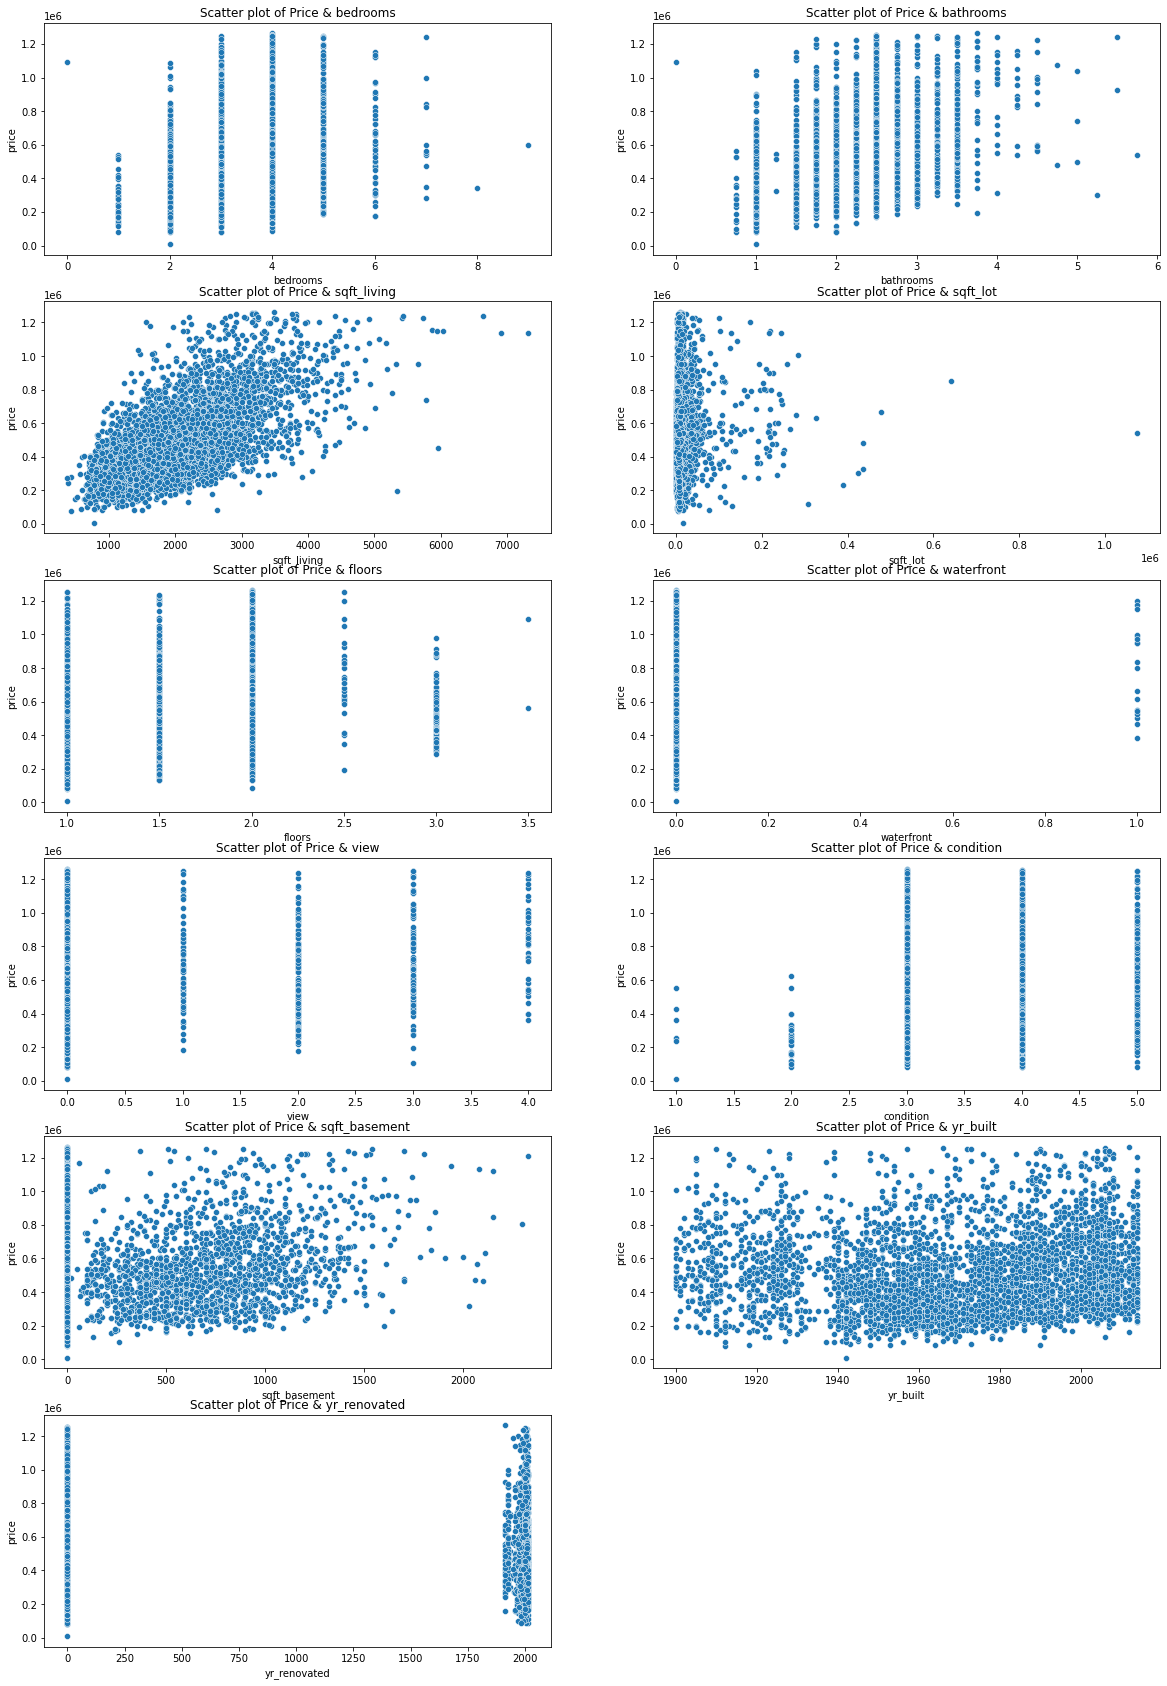

In [21]:
# Plotting 2D Scatter plots
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,35))
listContinuous.remove('sqft_above')
for i in listContinuous:
    plt.subplot(a, b, c)
    plt.title('Scatter plot of Price & {}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = df_sydney, x = df_sydney[i], y = 'price')
    c = c + 1

plt.show()

### 4) a. Encoding categorical variables

In [34]:
ct = ColumnTransformer([("onehot", OneHotEncoder(handle_unknown = "ignore"), ['city']),
                        ("scaling", StandardScaler(), ['bedrooms', 'bathrooms','sqft_living','sqft_lot',
                                                      'floors','waterfront','view','condition','sqft_basement',
                                                      'yr_built','yr_renovated'])])

In [35]:
# Get all columns apart from price for the features
X = df_sydney.drop('price', axis=1)
y = df_sydney['price']

In [36]:
# Split into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
ct.fit(X_train)

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['city']),
                                ('scaling', StandardScaler(),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'sqft_lot', 'floors', 'waterfront', 'view',
                                  'condition', 'sqft_basement', 'yr_built',
                                  'yr_renovated'])])

In [38]:
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(3273, 55)


### 4) c. Implementing Models

In [39]:
# Linear Regression
# Training
linreg = LinearRegression().fit(X_train_trans, y_train)
print("Train score: {:.2f}".format(linreg.score(X_train_trans, y_train)))

# Testing
X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(linreg.score(X_test_trans, y_test)))

Train score: 0.71
Test score: 0.67


In [40]:
# Ridge
ridgeReg = Ridge(alpha = 0,normalize = True).fit(X_train_trans, y_train)
print("Test score: {:.2f}".format(ridgeReg.score(X_train_trans, y_train)))

print("Test score: {:.2f}".format(ridgeReg.score(X_test_trans, y_test)))

Test score: 0.71
Test score: 0.67


In [41]:
# Lasso
lassoReg = LassoCV(cv = 5,random_state = 0).fit(X_train_trans, y_train)
print("Test score: {:.2f}".format(lassoReg.score(X_train_trans, y_train)))

print("Test score: {:.2f}".format(linreg.score(X_test_trans, y_test)))

Test score: 0.70
Test score: 0.67


In [42]:
# Elasticnet
elasticReg = ElasticNetCV(cv = 5,random_state = 0).fit(X_train_trans, y_train)
print("Test score: {:.2f}".format(elasticReg.score(X_train_trans, y_train)))

print("Test score: {:.2f}".format(linreg.score(X_test_trans, y_test)))

Test score: 0.01
Test score: 0.67
